(irt-notebook)=
# Modelli di risposta all'item 

In [1]:
suppressPackageStartupMessages({
    library(ltm)
    library(lme4)
    library(mirt)
    })

ERROR: Error in library(ltm): non c'è alcun pacchetto chiamato ‘ltm’


## Analisi del tratto latente

Supponiamo che un docente stia insegnando il corso di "Testing psicologico" e desideri valutare gli studenti sulla base della loro comprensione del materiale trattato. L'unico strumento a disposizione del docente per valutare gli studenti è l'esame. L'esame è costituito da una serie di domande riguardanti gli argomenti trattati durante il corso, e ogni studente può rispondere correttamente o erroneamente a ciascuna domanda.

Le domande dell'esame sono state progettate con lo scopo di misurare un singolo tratto latente: la competenza degli studenti nel dominio di conoscenza trattato nel corso. Questa competenza non è direttamente osservabile ma può essere caratterizzata come un *tratto latente*, un attributo nascosto posseduto da ciascuno studente. Lo scopo dell'esame è quindi quello di misurare la posizione di ogni studente su un continuum latente che rappresenta il grado di competenza nel dominio di conoscenza considerato.

Indichiamo con $\theta \in (-\infty, \infty)$ la competenza latente di uno studente e con $P_i \in (0, 1)$ la probabilità che lo studente risponda correttamente alla domanda $i$-esima. Il problema è quello di descrivere la funzione che mette in relazione la probabilità di una risposta corretta con la competenza latente dello studente. Tuttavia, poiché $\theta$ è una variabile latente, non osservabile direttamente, non possiamo utilizzare un'analisi statistica tradizionale per trattare i dati. Non possiamo applicare, ad esempio, un'analisi fattoriale perché le variabili osservate (le risposte alle domande) sono di tipo binario.

Il problema di mettere in relazione un insieme di variabili osservabili (le risposte alle domande) con una variabile latente è comune a molte situazioni in statistica. Questo tipo di analisi statistica rientra nella categoria dei *modelli a variabili latenti* o *latent variable analysis*. Esistono diversi tipi di modelli a variabili latenti, che si distinguono in base alla natura delle variabili osservate e alle assunzioni sulle variabili latenti. Secondo la classificazione di Bartholomew e Knott (1999), nel caso in cui le variabili osservate siano categoriali e le variabili latenti siano continue, ci troviamo nella classe dell'analisi del tratto latente (*Latent Trait Analysis*, LTA).

|                |             Metodo                    | Variabili latenti |
|----------------|---------------------------------------| -----------------------------|
| Var. osservate | Continue                              | Categoriali                  |
| Continue       | Analisi fattoriale                    | Analisi del profilo latente  |
| Categoriali    | Analisi del tratto latente            | Analisi della classe latente |

L'analisi del tratto latente è particolarmente adatta per affrontare il problema di misurare tratti latenti in presenza di dati categoriali, come nel nostro caso, in cui le risposte alle domande dell'esame sono di tipo dicotomico (corrette/errate) e vogliamo ottenere una stima della competenza latente di ciascuno studente.

In sintesi, l'analisi del tratto latente ci permette di valutare gli studenti in "Testing psicologico" misurando il tratto latente della loro competenza nei diversi argomenti del corso, utilizzando le risposte corrette o errate alle domande dell'esame. Questo approccio ci consente di ottenere una stima della competenza latente di ciascuno studente, non direttamente osservabile, ma di grande rilevanza per la valutazione delle conoscenze acquisite nel corso.

## La matrice dei dati

Iniziamo considerando il caso più semplice. Si supponga che la variabile risposta abbia due modalità, convenzionalmente chiamate successo (o, comunque, risposta positiva) e insuccesso (o risposta negativa).  Un modo conveniente di procedere è quello di indicare con 1 il successo e con 0 l'insuccesso. Questa convenzione ha il vantaggio che, sommando i valori di una qualsiasi riga della matrice dei dati si ottiene il numero totale di risposte per le quali si è osservato un successo. 
La matrice dei dati che riporta le risposte fornite da $n$ rispondenti a $p$ item dicotomici assume dunque la forma indicata nella tabella XX

Per consentire la riproducibilità dei risultati, utilizzeremo i dati contenuti nel data.frame LSAT disponibile nel pacchetto `ltm`. Tale data.frame contiene le risposte di 1000 individui su 5 item del *Law School Admission Test* (LSAT) e costituisce  un sottoinsieme dei dati analizzati da Bock and Lieberman (1970). Il questionario è costituito da 5 batterie di domande a scelta multipla selezionate per misurare tre abilità considerate essenziali per il successo nella *Law School*: lettura e comprensione del testo, ragionamento analitico e ragionamento logico. 

In [31]:
data(LSAT7, package = "mirt")
dat <- expand.table(LSAT7)
head(dat)

,Item.1,Item.2,Item.3,Item.4,Item.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


### Il pattern di risposta

La matrice di dati contiene tante righe quanti sono i rispondenti, ed ogni riga rappresenta un *pattern di risposta*. Nel caso di $p$ item binari, ci sono $2^p$ possibili pattern di risposta. Ad esempio, se $p = 5$, avremo 32 diversi pattern di risposta possibili. Tuttavia, se il numero di rispondenti è molto più grande di $2^p$, molti pattern di risposta saranno ripetuti. Di conseguenza, è più conveniente rappresentare la matrice dei dati come una lista dei possibili pattern di risposta, insieme alle relative frequenze. 


L'ultima colonna della tabella mostra quanti volte ciascun pattern di risposta si ripete nella matrice dei dati. Tuttavia, è possibile che alcuni pattern di risposta non siano presenti nella matrice dei dati e quindi non vengano riportati nella tabella.

In [35]:
# Conta i pattern di risposta e calcola le frequenze
response_patterns <- table(apply(LSAT7, 1, paste, collapse = ","))

# Crea una tabella con i pattern di risposta e le relative frequenze
response_table <- data.frame(Pattern = names(response_patterns), Frequenza = as.integer(response_patterns))

# Ordina la tabella in ordine decrescente di frequenza
response_table <- response_table[order(-response_table$Frequenza), ]

# Visualizza la tabella
print(response_table)

         Pattern Frequenza
1   0,0,0,0,0,12         1
2   0,0,0,0,1,19         1
3    0,0,0,1,0,1         1
4    0,0,0,1,1,7         1
5    0,0,1,0,0,3         1
6   0,0,1,0,1,19         1
7    0,0,1,1,0,3         1
8   0,0,1,1,1,17         1
9   0,1,0,0,0,10         1
10   0,1,0,0,1,5         1
11   0,1,0,1,0,3         1
12   0,1,0,1,1,7         1
13   0,1,1,0,0,7         1
14  0,1,1,0,1,23         1
15   0,1,1,1,0,8         1
16  0,1,1,1,1,28         1
17   1,0,0,0,0,7         1
18  1,0,0,0,1,39         1
19  1,0,0,1,0,11         1
20  1,0,0,1,1,34         1
21  1,0,1,0,0,14         1
22  1,0,1,0,1,51         1
23  1,0,1,1,0,15         1
24  1,0,1,1,1,90         1
25   1,1,0,0,0,6         1
26  1,1,0,0,1,25         1
27   1,1,0,1,0,7         1
28  1,1,0,1,1,35         1
29  1,1,1,0,0,18         1
30 1,1,1,0,1,136         1
31  1,1,1,1,0,32         1
32 1,1,1,1,1,308         1


In [42]:
# Calcola il numero di risposte corrette per ogni item
correct_responses <- colSums(dat)

# Calcola il numero totale di risposte per ogni item
total_responses <- nrow(dat)

# Calcola le percentuali di risposte corrette per ogni item
percent_correct <- (correct_responses / total_responses) * 100

# Visualizza i risultati
print(paste("Nel campione, il", round(percent_correct[1], 2), "% dei rispondenti ha fornito una risposta corretta per il primo item."))
print(paste(
    "Per gli item 2, 3, 4 e 5 le percentuali di risposte corrette sono rispettivamente del",
    round(percent_correct[2], 2), "%,",
    round(percent_correct[3], 2), "%,",
    round(percent_correct[4], 2), "%, e",
    round(percent_correct[5], 2), "%."
))

[1] "Nel campione, il 82.8 % dei rispondenti ha fornito una risposta corretta per il primo item."
[1] "Per gli item 2, 3, 4 e 5 le percentuali di risposte corrette sono rispettivamente del 65.8 %, 77.2 %, 60.6 %, e 84.3 %."


Quando trattiamo variabili continue, il nostro obiettivo è eseguire un'analisi fattoriale per cercare di spiegare le correlazioni osservate tra le coppie di item in termini di uno o più fattori latenti. Tale approccio può essere seguito anche nel caso di item dicotomici. Anche in questo caso, dobbiamo considerare tutte le associazioni a coppie tra gli item e per ciascuna coppia esaminare la tabella di contingenza $2 \times 2$. Questa tabella mostra le frequenze delle diverse combinazioni possibili di risposte per i due item.

Ad esempio, incrociando i primi due item, otteniamo la seguente tabella di contingenza:

|    | 0   | 1   |
|----|-----|-----|
| 0  | 31  | 45  |
| 1  | 260 | 664 |

È facile rendersi conto che tali item sono associati. Infatti,

In [44]:
head(dat)

,Item.1,Item.2,Item.3,Item.4,Item.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


In [45]:
table(dat$Item.1, dat$Item.2, dnn = c("Item 1", "Item 2"))

      Item 2
Item 1   0   1
     0  81  91
     1 261 567

In [46]:
chisq.test(dat$Item.1, dat$Item.2)


	Pearson's Chi-squared test with Yates' continuity correction

data:  dat$Item.1 and dat$Item.2
X-squared = 14.66, df = 1, p-value = 0.0001287


Un'analisi simile può essere eseguita per tutte le altre coppie di item. Come nell'analisi fattoriale, l'obiettivo è determinare se queste associazioni tra gli item siano il risultato della presenza di uno o più fattori comuni non osservati. Se si riesce ad identificare tali fattori, diventa possibile calcolare i punteggi fattoriali dei rispondenti sulle dimensioni latenti corrispondenti. In questo modo, possiamo ottenere una rappresentazione più comprensiva della struttura nascosta dietro le risposte degli individui e compiere una valutazione più approfondita delle loro competenze e abilità nei vari ambiti considerati.

## Analisi fattoriale classica e variabili binarie

Esaminiamo il motivo per cui non possiamo applicare l'analisi fattoriale alla matrice di correlazioni calcolata tra ciascuna coppia di item dicotomici, come discusso in precedenza. La ragione principale è che l'analisi fattoriale si basa su un modello che assume una relazione lineare tra le variabili latenti e i punteggi osservati. In particolare, il modello fattoriale è espresso dall'equazione:

$$
Y_i - \mu_i = \lambda_{i1}\xi_1 + \lambda_{i2}\xi_2 + \dots + \lambda_{im}\xi_m + \delta_i,
$$

dove $\xi_j$ e i $\delta_i$ sono variabili continue, indipendenti tra loro, che possono assumere qualsiasi valore. Tuttavia, nel caso dei dati binari che stiamo considerando, la variabile risposta può assumere solo i valori 0 e 1. Ciò significa che un modello lineare, come quello utilizzato nell'analisi fattoriale, non può essere adeguatamente utilizzato per modellare variabili binarie o, in generale, variabili categoriali.

In altre parole, l'analisi fattoriale è appropriata solo per dati continui, in cui le variabili latenti e i punteggi osservati possono variare su una scala continua. Nel nostro caso, essendo i dati binari, la relazione tra le variabili è di natura discreta e non può essere rappresentata in modo lineare. Di conseguenza, dobbiamo ricorrere a modelli specifici per variabili dicotomiche, come l'analisi del tratto latente, che possono affrontare adeguatamente la natura categoriale dei nostri dati.

### Modello fattoriale per risposte binarie

Per studiare la relazione tra variabili latenti continue e variabili osservate categoriali, dobbiamo trovare un modello adeguato. Iniziamo con il caso più semplice, in cui abbiamo item dicotomici e una sola variabile latente, che rappresenta l'abilità del rispondente rispetto ai quesiti dell'esame di Testing psicologico.

Il modello desiderato deve mettere in relazione l'abilità latente $\theta \in (-\infty, \infty)$ con la probabilità di rispondere correttamente all'item $i$-esimo $P_i \in (0, 1)$. La funzione che descrive questa relazione è chiamata *funzione caratteristica dell'item* e deve mappare l'intervallo $(0, 1)$ nell'intervallo $(-\infty, \infty)$. Inoltre, deve essere monotona, ovvero un incremento della variabile latente $\xi$ deve determinare un incremento della probabilità di risposta corretta.

Per ottenere ciò, i modelli a tratto latente adottano un approccio simile a quello utilizzato nella regressione logistica. Nella regressione logistica, viene utilizzata una funzione legame chiamata funzione logit:

$$
P(\theta) = \frac{e^{f(\theta)}}{1+e^{f(\theta)}},
$$

dove $P(\theta)$ è la probabilità che la variabile osservata sia uguale a 1, dato il valore della variabile latente $\theta$, e $f(\theta)$ è una funzione che mappa $\theta$ nell'intervallo $(-\infty, \infty)$.

Per adattare il modello statistico della regressione logistica alle variabili categoriali, consideriamo la regressione di ciascun item sulla variabile latente $\xi$. Se l'item è dicotomico, la regressione si riduce a calcolare la probabilità condizionata di successo dato il valore della variabile latente $\xi$, denotata come $\pi_i(\xi)$. Utilizzando la funzione logit, l'equazione del modello diventa:

$$
\ln \left(\frac{\pi_i(\xi)}{1-\pi_i(\xi)}\right) = \mu_i + \lambda_i \xi,
$$

dove $\mu_i$ è l'intercetta dell'item $i$-esimo e $\lambda_i$ è il coefficiente di regressione corrispondente alla variabile latente $\xi$ per l'item $i$-esimo.

La probabilità $\pi_i(\xi)$ rappresenta la probabilità di "successo" per l'item $i$, e il rapporto $\pi_i(\xi)/[1-\pi_i(\xi)]$ definisce l'Odds di "successo". Il logaritmo dell'Odds è chiamato logit. Utilizzando la trasformazione inversa, possiamo esprimere la probabilità $\pi_i(\xi)$ come segue:

$$
\pi_i(\xi) = \frac{e^{\mu_i + \lambda_i \xi}}{1+e^{\mu_i + \lambda_i \xi}}.
$$ (eq-mod-LTA-prob1)

In questa forma, abbiamo espresso la probabilità di successo come funzione non lineare dell'abilità latente $\xi$. Questa funzione non lineare definisce la *funzione caratteristica dell'item* nei modelli a tratto latente. Tale funzione ci permette di collegare le variabili latenti continue con le variabili osservate categoriali.

## Interpretazione dei parametri

Nel modello {eq}`eq-mod-LTA-prob1`, i coefficienti $\lambda_{i}$ si interpretano nello stesso modo in cui vengono interpretate le saturazioni fattoriali nell'analisi fattoriale. Un valore maggiore di $\lambda_{i}$ indica un effetto più pronunciato del fattore latente sulla probabilità di una risposta corretta all'item $i$-esimo. In altre parole, tanto maggiore è $\lambda_{i}$, tanto più l'item è sensibile all'abilità latente, e la probabilità di una risposta corretta aumenta rapidamente con l'aumentare dell'abilità del rispondente.

Nel modello {eq}`eq-mod-LTA-prob1`, la variabile latente $\xi$ rappresenta il grado di presenza del tratto latente in ciascun rispondente e, quindi, può essere interpretata come il livello di abilità o competenza del rispondente rispetto all'argomento in esame. La probabilità di risposta corretta in funzione dell'abilità latente varia in maniera più o meno rapida a seconda del valore di $\lambda$. Pertanto, $\lambda$ viene chiamato *parametro di discriminazione*: gli item con valori di $\lambda$ più alti sono in grado di discriminare meglio tra individui con livelli diversi di abilità latente. In altre parole, item con $\lambda$ elevati sono più sensibili alle differenze di abilità tra i partecipanti e mostrano una maggiore variazione nella probabilità di risposta corretta al variare dell'abilità latente.

Oltre a $\lambda$, il modello {eq}`eq-mod-LTA-prob1` contiene anche il parametro $\mu$. Per comprendere le conseguenze delle variazioni del parametro $\mu$, consideriamo un rispondente con un livello di abilità pari a $\xi = 0$. Questa situazione corrisponde all'individuo medio nella popolazione, poiché $\xi$ ha una distribuzione normale standardizzata. Secondo il modello {ref}`eq-mod-LTA-prob1`, la probabilità che l'individuo medio risponda correttamente all'item $i$-esimo è:

$$
\begin{equation}
\pi_i(Y_i=1 \mid \xi=0) = \frac{ e^{\mu_i} }{1+e^{\mu_i}}.
\end{equation}
$$

Da questa formula, possiamo dedurre che la probabilità di risposta corretta è maggiore di $0.50$ per valori di $\mu_i > 0$, mentre è minore di $0.50$ per valori di $\mu_i < 0$. Nella formulazione del modello a tratto latente, quindi, un aumento del valore di $\mu_i$ aumenta la probabilità di una risposta corretta. Possiamo quindi interpretare $\mu_i$ come la *facilità* dell'item $i$-esimo. È importante notare che nella formulazione tradizionale del modello a tratto latente, il coefficiente $\mu_i$ viene cambiato di segno in modo da rappresentare la *difficoltà* dell'item.

## Il principio dell'indipendenza locale

L'analisi fattoriale si basa sull'idea che la covarianza (o correlazione) tra ciascuna coppia di variabili manifeste si annulli quando i fattori non osservati sono controllati. Nei modelli a tratto latente, l'assunzione dell'indipendenza locale è ancora più rigorosa: *condizionatamente al tratto latente, le risposte agli item devono essere indipendenti*. Questa assunzione riguarda non solo le associazioni tra due item, ma anche le associazioni tra triplette di item, quadruple di item e così via. Inoltre, un'assunzione implicita in questa è l'incorrelazione tra ciascuna coppia di item, mantenendo costante la variabile latente.

Nei modelli a tratto latente, il fattore latente viene interpretato come nella classica analisi fattoriale, ovvero come la causa sottostante che spiega le associazioni tra le variabili manifeste. Anche nei modelli a tratto latente, quindi, il fattore latente è visto come l'attributo comune a tutti gli item. Di solito, invece di basarsi sull'assunzione forte dell'indipendenza locale, i modelli cercano di trovare il fattore latente che spiega al meglio tutte le associazioni bivariate tra gli item.

## Modello di Rasch

Il modello a tratto latente più semplice ipotizza curve caratteristiche identiche per tutti gli item. Questa ipotesi corrisponde all'ipotesi di item paralleli nei modelli per variabili continue, come nell'analisi fattoriale. Questo modello, noto come "modello di Rasch", ipotizza un unico tratto latente e può essere visto come l'equivalente del modello ad un solo fattore comune di Spearman. Una volta stimati i parametri del modello e verificato il buon adattamento ai dati, è possibile determinare la posizione di ciascun rispondente lungo il continuum del tratto latente.

Il modello {eq}`eq-rasch-model` è stato introdotto nella letteratura psicometrica da Rasch (1960) e solitamente viene scritto nella seguente forma:

$$
\begin{align} 
Pr(Y_{vi} = 1 \mid \theta_v, \beta_i) &= \frac{\exp(\theta_v-\beta_i)}{1+\exp(\theta_v-\beta_i)}\notag\\
&=\frac{1}{1+ \exp\left(-(\theta_v-\beta_i)\right)}.
\end{align}
$$ (eq-rasch-model)

## Significato dei parametri

Abbiamo introdotto il modello di Rasch utilizzando la notazione del predittore lineare come $\mu_i + \lambda_i \xi$, in analogia con il modello dell'analisi fattoriale (vedi equazione {eq}`eq-mod-LTA-prob1`). Tuttavia, il modello {eq}`eq-rasch-model` è essenzialmente identico al modello {eq}`eq-mod-LTA-prob1`, ad eccezione della notazione. Nel modello {eq}`eq-rasch-model`, il parametro $\theta_{\nu}$ (con $\nu=1, \dots, n$) sostituisce il prodotto $\lambda\xi$ dell'equazione {eq}`eq-mod-LTA-prob1`. Questa nuova parametrizzazione è preferita perché $\theta_{\nu}$ rappresenta direttamente il livello di abilità latente del $\nu$-esimo rispondente. Inoltre, dopo aver cambiato di segno, il parametro $\mu_i$ del modello {eq}`eq-mod-LTA-prob1` è ora chiamato $\beta_i$. Questo cambiamento di segno è stato effettuato in modo che $\beta_i$ rappresenti la *difficoltà* dell'item $i$-esimo.

## Modello di Rasch sulla scala dei logit

Il modello di Rasch descrive la probabilità di una risposta corretta utilizzando la scala dei logit come unità di misura. Ricordiamo che il logit è il logaritmo naturale dell'Odds: $\ln \left[\frac{P(X=1)}{P(X=0)}\right]$. Pertanto, la probabilità dell'evento $Y=1$ può essere descritta utilizzando l'equazione {eq}`eq-rasch-model` come:

$$
\begin{align}
\ln \left[\frac{P(Y_{vi} = 1 \mid  \theta_v, \beta_i)}{1-P(Y_{vi} = 1 \mid \theta_v, \beta_i)} \right] &= \ln \left( \frac{ \frac{e^{\theta_v-\beta_i}}{1+e^{\theta_v-\beta_i}} }{ 1- \frac{e^{\theta_v-\beta_i}}{1+e^{\theta_v-\beta_i}}} \right)  \notag\\ 
&= \ln \left( \frac{ \frac{e^{\theta_v-\beta_i}}{1+e^{\theta_v-\beta_i}} }{  \frac{ 1+ e^{\theta_v-\beta_i} - e^{\theta_v-\beta_i}}{1+e^{\theta_v-\beta_i}}  } \right)\notag\\
&= \theta_v-\beta_i.
\end{align}
$$ (eq-rasch-logit)

Questo risultato indica che la probabilità di una risposta corretta all'$i$-esimo item, sulla scala dei logit, è data dalla differenza tra il livello di abilità $\theta_v$ del $v$-esimo rispondente e la difficoltà dell'item $\beta_i$. Quanto maggiore è la differenza $\theta_v-\beta_i$, tanto più grande sarà la probabilità di una risposta corretta $P(X_{vi} = 1)$ rispetto a quella di una risposta sbagliata $1-P(X_{vi} = 1)$. Di conseguenza, valori più elevati sulla scala dei logit indicano una differenza maggiore tra l'abilità del rispondente e la difficoltà dell'item.

## Assunzioni

Il modello di Rasch si basa su alcune assunzioni fondamentali:
1. Esiste un'unica dimensione latente $\theta_{v}$, chiamata abilità latente, associata a ogni rispondente $v$, che determina la capacità del rispondente di rispondere correttamente agli item.
2. La probabilità di rispondere correttamente all'$i$-esimo item, $P_i(\theta_v)$, aumenta all'aumentare del livello di abilità latente $\theta_v$ del rispondente.
3. La probabilità di risposta corretta tende a zero quando l'abilità del rispondente diminuisce, mentre tende a uno all'aumentare dell'abilità del rispondente.
4. Gli elementi del vettore di risposte agli item $\boldsymbol{Y}_v=(Y_{v1}, \dots, Y_{vI})^{\intercal}$ sono mutuamente indipendenti, condizionatamente all'abilità $\theta_v$. In altre parole, tenendo costanti le abilità dei rispondenti, le risposte a qualsiasi coppia di item non risultano correlate. La dipendenza tra gli item è determinata unicamente dal tratto latente.
5. La statistica dei punteggi grezzi $r_v = \sum_{i=1}^{I}Y_{vi}$ è sufficiente per rappresentare l'abilità latente $\theta_v$, il che significa che la configurazione di risposte fornite dal rispondente non contiene informazioni aggiuntive oltre a quelle fornite da $r_v$ per stimare $\theta_v$.

Svolgiamo i calcoli con R.

In [8]:
data(LSAT7, package = "mirt")
dat <- expand.table(LSAT7)
head(dat)

,Item.1,Item.2,Item.3,Item.4,Item.5
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
5,0,0,0,0,0
6,0,0,0,0,0


Adattiamo il modello di Rash ai dati.

In [9]:
m_rasch <- mirt(dat, model = 1, itemtype = "Rasch")

Iteration: 27, Log-Lik: -2664.901, Max-Change: 0.00009


Esaminiamo i coefficienti.

In [10]:
coef(m_rasch, IRTpars = TRUE) # d = intercept = -1 * difficulty

$Item.1
    a      b g u
par 1 -1.868 0 1

$Item.2
    a      b g u
par 1 -0.791 0 1

$Item.3
    a      b g u
par 1 -1.461 0 1

$Item.4
    a      b g u
par 1 -0.521 0 1

$Item.5
    a      b g u
par 1 -1.993 0 1

$GroupPars
    MEAN_1 COV_11
par      0  1.022

Il modello 1PL è una semplice riparametrizzazione del modello di Rash.

In [11]:
# 1PL
mod_1pl <- "
THETA = 1-5
CONSTRAIN = (1-5, a1)
"
m_1pl <- mirt(dat, mod_1pl)

Iteration: 12, Log-Lik: -2664.901, Max-Change: 0.00006


In [12]:
coef(m_1pl, IRTpars = TRUE) # b = difficulty

$Item.1
        a      b g u
par 1.011 -1.848 0 1

$Item.2
        a      b g u
par 1.011 -0.782 0 1

$Item.3
        a      b g u
par 1.011 -1.445 0 1

$Item.4
        a      b g u
par 1.011 -0.516 0 1

$Item.5
        a      b g u
par 1.011 -1.971 0 1

$GroupPars
    MEAN_1 COV_11
par      0      1

Esaminiamo gli errori standard.

In [13]:
m_rasch <- mirt(dat, model = 1, itemtype = "Rasch", SE = TRUE)

Iteration: 27, Log-Lik: -2664.901, Max-Change: 0.00009

Calculating information matrix...


In [14]:
coef(m_rasch, IRTpars = TRUE)

,a,b,g,u
par,1,-1.868072,0,1
CI_2.5,NA,-2.064887,NA,NA
CI_97.5,NA,-1.671256,NA,NA
,a,b,g,u
par,1,-0.7909134,0,1
CI_2.5,NA,-0.9499588,NA,NA
CI_97.5,NA,-0.6318681,NA,NA
,a,b,g,u
par,1,-1.460823,0,1
CI_2.5,NA,-1.639767,NA,NA


Esaminiamo la funzione caratteristica dell'item (o *Item Response Function* o *item characteristic curve*). 

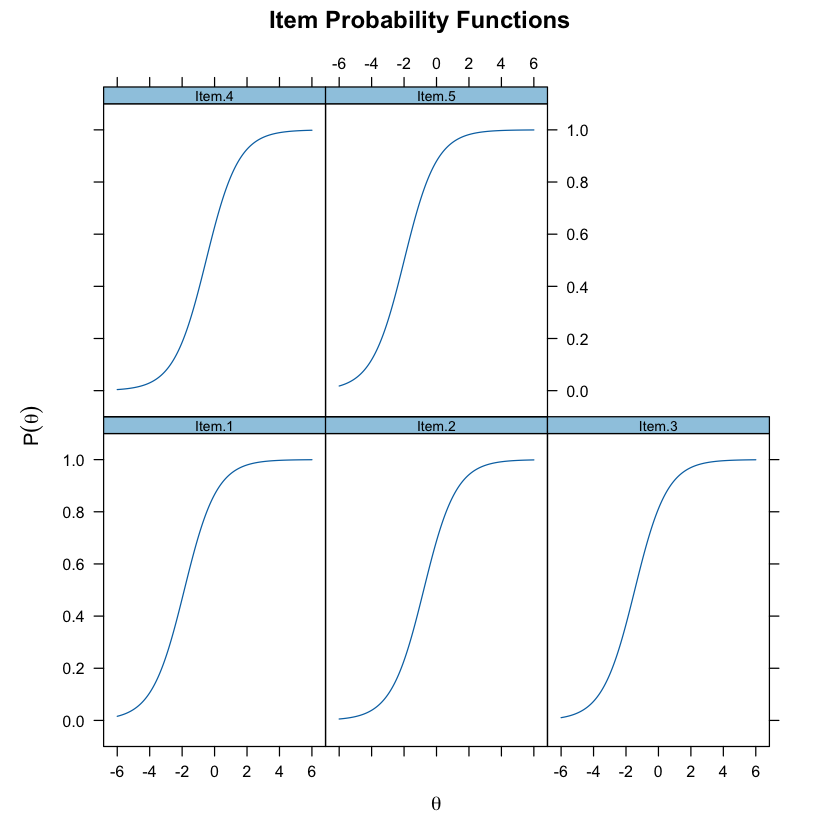

In [15]:
plot(m_rasch, type = "trace")

Consideriamo ora l'informazione dell'item (*Item information*).

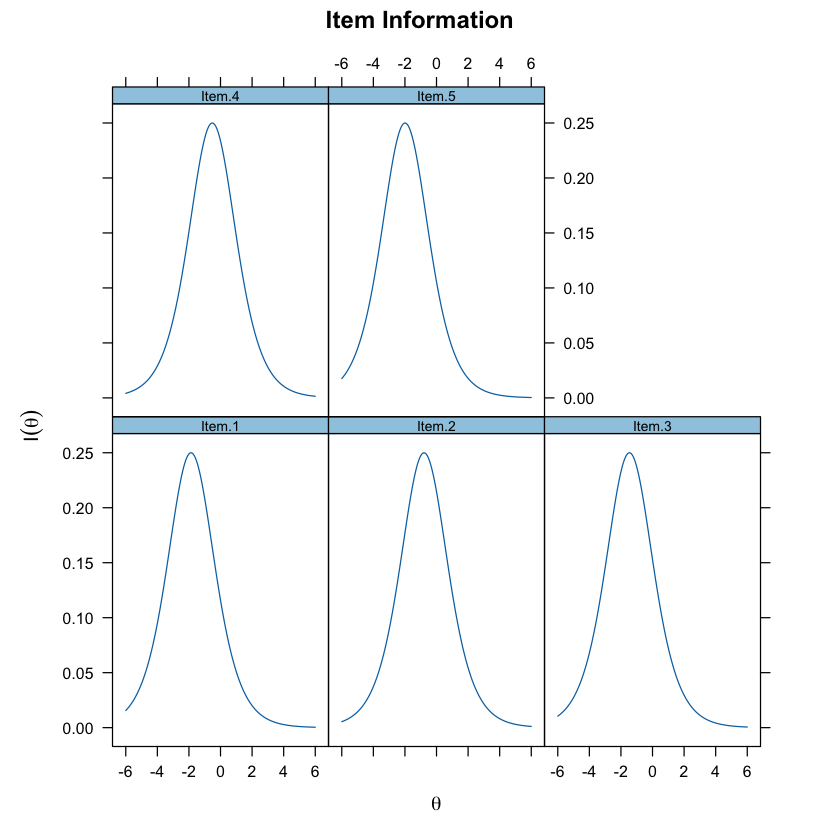

In [16]:
plot(m_rasch, type = "infotrace")

Esaminiamo l'informazione del test.

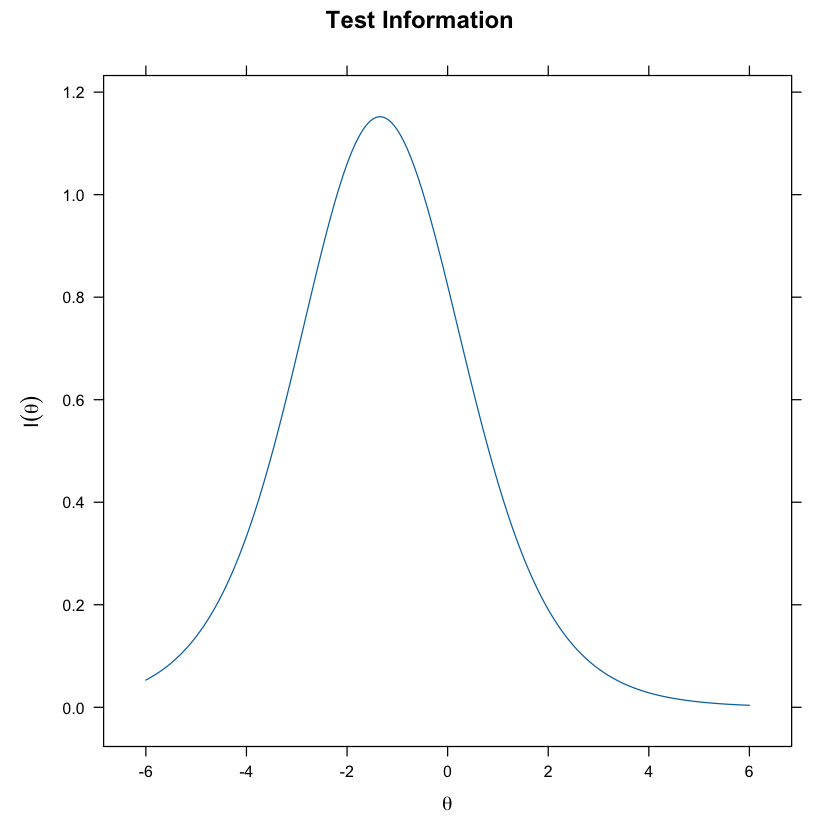

In [17]:
plot(m_rasch, type = "info")

Valutiamo le assunzioni (bontà di adattamento).

In [18]:
m_rasch


Call:
mirt(data = dat, model = 1, itemtype = "Rasch", SE = TRUE)

Full-information item factor analysis with 1 factor(s).
Converged within 1e-04 tolerance after 27 EM iterations.
mirt version: 1.39 
M-step optimizer: nlminb 
EM acceleration: Ramsay 
Number of rectangular quadrature: 61
Latent density type: Gaussian 

Information matrix estimated with method: Oakes
Second-order test: model is a possible local maximum
Condition number of information matrix =  4.488772

Log-likelihood = -2664.901
Estimated parameters: 6 
AIC = 5341.802
BIC = 5371.248; SABIC = 5352.192
G2 (25) = 43.89, p = 0.0112
RMSEA = 0.028, CFI = NaN, TLI = NaN

In [19]:
M2(m_rasch)

,M2,df,p,RMSEA,RMSEA_5,RMSEA_95,SRMSR,TLI,CFI
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stats,23.17287,9,0.00581954,0.03970314,0.02003961,0.05998303,0.04744033,0.9284234,0.9355811


Esaminiamo l'assunzione di unidimensionalità.

Parallel analysis suggests that the number of factors =  2  and the number of components =  1 


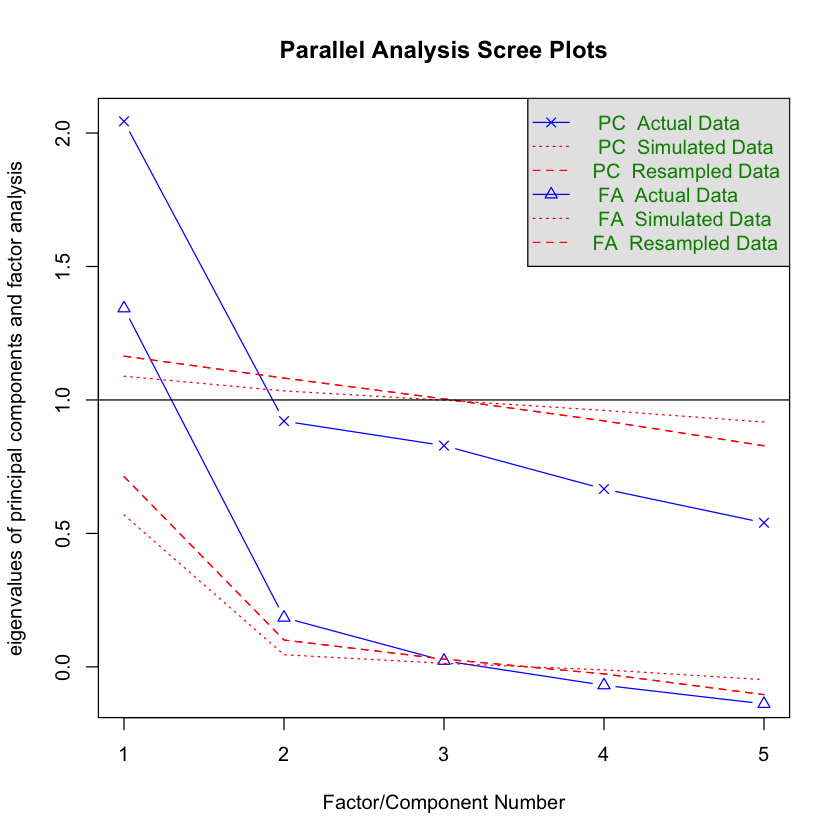

In [20]:
psych::fa.parallel(dat, cor = "poly")

Eseguiamo il DIMTEST. Un valore DETECT < .20 suggerisce la presenza di unidimensionalità.

In [22]:
wle_scores <- fscores(m_rasch, method = "WLE")
detect1 <- sirt::conf.detect(dat,
    score = as.vector(wle_scores),
    itemcluster = rep(1, 5)
)

-----------------------------------------------------------
Confirmatory DETECT Analysis 
Conditioning on 1 Score
Bandwidth Scale: 1.1 
Pairwise Estimation of Conditional Covariances
...........................................................
Nonparametric ICC estimation 
 
...........................................................
Nonparametric Estimation of conditional covariances 
 5% 10% 15% 20% 25% 30% 35% 40% 45% 50% 

-----------------------------------------------------------
          unweighted weighted
DETECT        -3.437   -3.437
ASSI          -1.000   -1.000
RATIO         -1.000   -1.000
MADCOV100      3.437    3.437
MCOV100       -3.437   -3.437


Considriamo l'assunzione di indipendenza locale.

In [23]:
residuals(m_rasch, type = "Q3") 

Q3 summary statistics:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -0.196  -0.145  -0.116  -0.110  -0.082   0.000 

       Item.1 Item.2 Item.3 Item.4 Item.5
Item.1  1.000 -0.136 -0.099 -0.080 -0.051
Item.2 -0.136  1.000  0.000 -0.196 -0.169
Item.3 -0.099  0.000  1.000 -0.133 -0.090
Item.4 -0.080 -0.196 -0.133  1.000 -0.149
Item.5 -0.051 -0.169 -0.090 -0.149  1.000


Tutti |Q3| < 0.2.

Consideriamo l'item fit.

In [24]:
itemfit(m_rasch)

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Item.1,5.592901,2,0.04240576,0.061026304
Item.2,12.187907,2,0.07140765,0.002256471
Item.3,8.589157,2,0.05742714,0.013642324
Item.4,8.986506,2,0.05913332,0.011184204
Item.5,4.876700,2,0.03794456,0.087304802


Per grandi numeri di risposte, i valori p devono essere corretti.

In [25]:
itemfit(m_rasch, p.adjust = "holm")

item,S_X2,df.S_X2,RMSEA.S_X2,p.S_X2
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
Item.1,5.592901,2,0.04240576,0.12205261
Item.2,12.187907,2,0.07140765,0.01128235
Item.3,8.589157,2,0.05742714,0.04473682
Item.4,8.986506,2,0.05913332,0.04473682
Item.5,4.876700,2,0.03794456,0.12205261


In conclusione, abbiamo varie evidenze di violazione delle assunzioni, per cui dobbiamo concludere che il modello di Rash non è adeguato per i presenti dati.

## Modello IRT a due parametri

Il modello 2PL, noto come "Modello IRT a due parametri", prevede che le curve caratteristiche degli item non siano tra loro parallele. Questo modello utilizza due parametri per descrivere le curve caratteristiche di ciascun item: il parametro di difficoltà $\beta_i$ e il parametro di discriminazione $\alpha_i$. Il parametro $\alpha_i$ consente alle curve caratteristiche di avere pendenze diverse e riflette la capacità discriminante dell'item rispetto alla variabile latente. Le curve caratteristiche nel modello 2PL hanno la seguente forma:

$$
\begin{equation} 
  Pr(X_{vi} = 1 \mid \theta_v, \beta_i, \alpha_i) = \frac{\exp(\alpha_i(\theta_v-\beta_i))}{1+ \exp(\alpha_i(\theta_v-\beta_i))}.
\end{equation}
$$ (eq-2pl)

Adattiamo il modello 2PL ai dati.

In [26]:
m_2pl <- mirt(dat, model = 1, itemtype = "2PL")

Iteration: 28, Log-Lik: -2658.805, Max-Change: 0.00010


Esaminiamo i coefficienti.

In [27]:
coef(m_2pl, IRTpars = TRUE)

$Item.1
        a      b g u
par 0.988 -1.879 0 1

$Item.2
        a      b g u
par 1.081 -0.748 0 1

$Item.3
        a      b g u
par 1.706 -1.058 0 1

$Item.4
        a      b g u
par 0.765 -0.635 0 1

$Item.5
        a     b g u
par 0.736 -2.52 0 1

$GroupPars
    MEAN_1 COV_11
par      0      1

Esaminiamo le curve caratteristiche degli item.

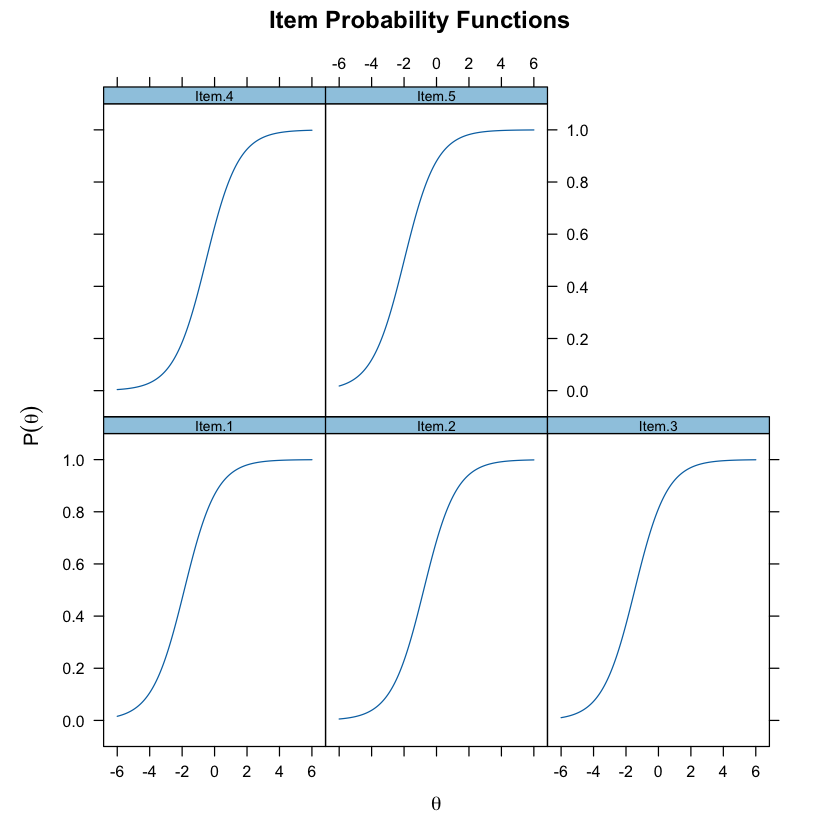

In [28]:
plot(m_rasch, type = "trace")

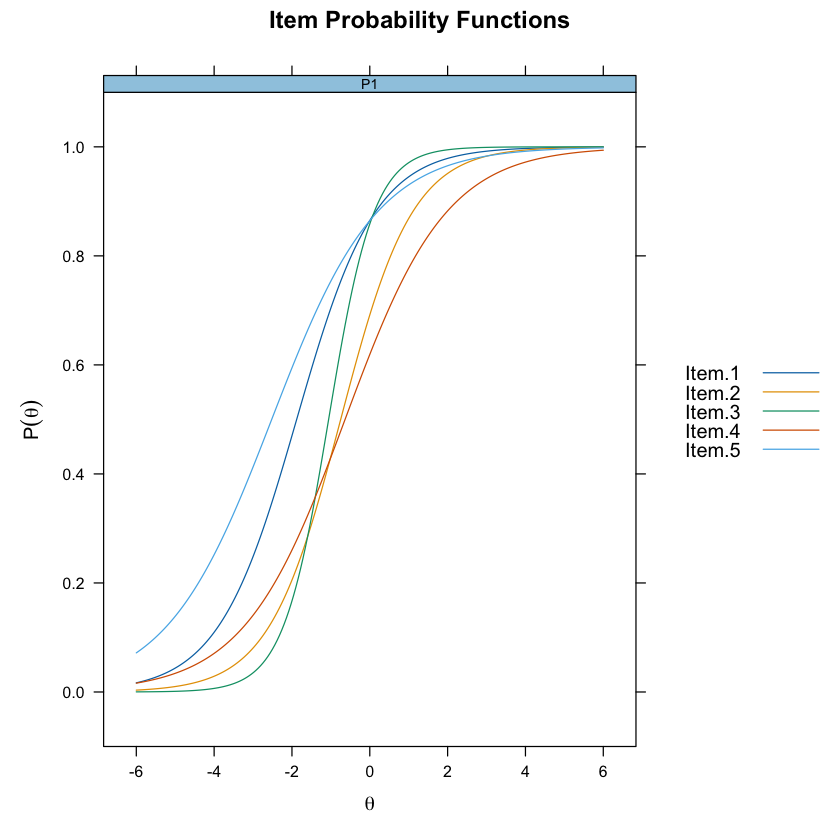

In [29]:
plot(m_2pl, type = "trace", facet_items = FALSE)

Effettuiamo un confronto tra il modello di Rash e il 2PL model.

In [30]:
anova(m_rasch, m_2pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_rasch,5341.802,5352.192,5352.994,5371.248,-2664.901,NA,NA,NA
m_2pl,5337.610,5354.927,5356.263,5386.688,-2658.805,12.19156,4,0.01598222


Il test del rapporto di verosimiglianze indica che il modello 2PL fornisce un adattamento migliore ai dati del modello di Rash.

## Modello IRT a tre parametri

Per considerare l'eventuale tendenza dei rispondenti a indovinare, i modelli IRT introducono un ulteriore parametro, denotato con $\gamma_i$. Il modello a tre parametri (3PL) assume la seguente forma:

$$
\begin{equation} 
Pr(X_{vi} = 1 \mid \theta_v, \beta_i, \alpha_i, \gamma_i) = \gamma_i + (1-\gamma_i) \frac{\exp(\alpha_i(\theta_v-\beta_i))}{1 + \exp(\alpha_i(\theta_v-\beta_i))}.
\end{equation}
$$ (eq-3pl)

Il parametro $\gamma_i$ ha l'effetto di introdurre un asintoto orizzontale maggiore di zero per valori di $\theta_v$ tendenti a $-\infty$. In altre parole, per item con $\gamma_i = 0.25$, la probabilità di risposta corretta dovuta al caso è almeno pari a 0.25, anche per i livelli di abilità latente più bassi.

In [47]:
m_3pl <- mirt(dat, model = 1, itemtype = "3PL")

Iteration: 133, Log-Lik: -2658.055, Max-Change: 0.00010


Esaminiamo i parametri

In [48]:
coef(m_3pl, IRTpars = TRUE)

$Item.1
        a      b g u
par 1.007 -1.853 0 1

$Item.2
        a      b     g u
par 1.928 -0.049 0.295 1

$Item.3
        a      b g u
par 1.667 -1.068 0 1

$Item.4
        a      b g u
par 0.736 -0.655 0 1

$Item.5
        a      b g u
par 0.767 -2.436 0 1

$GroupPars
    MEAN_1 COV_11
par      0      1

Esaminiamo le curve caratteristiche degli item.

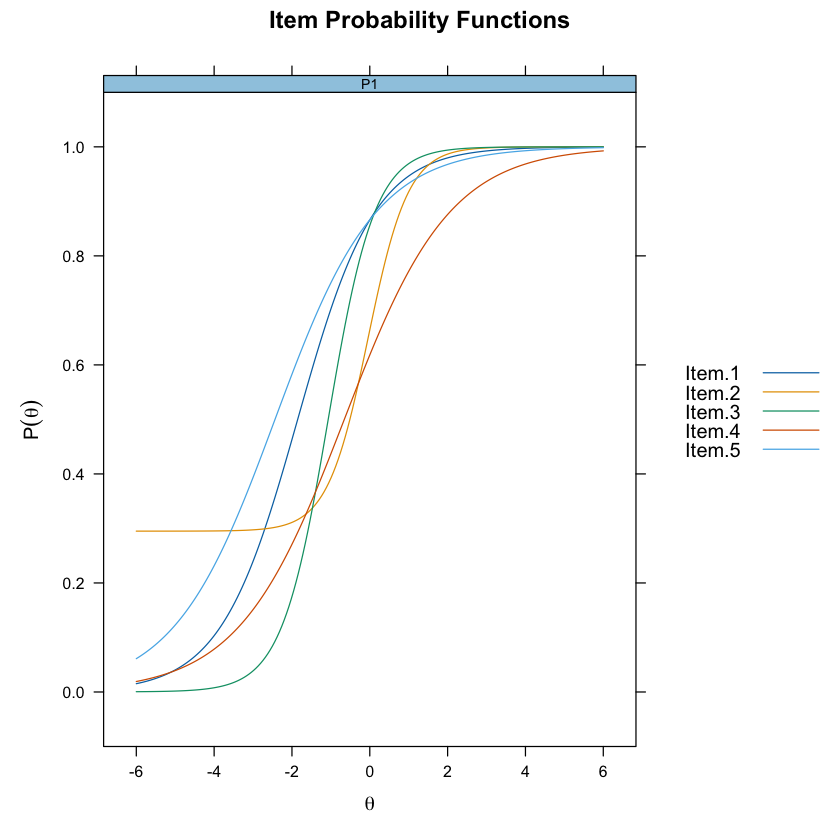

In [49]:
plot(m_3pl, type = "trace", facet_items = FALSE)

Un elemento chiave del modello 3PL è che l'asintoto inferiore, rappresentato dal parametro $\gamma_i$, assume un valore maggiore di zero. Questo implica che la probabilità di una risposta corretta, rappresentata da $\gamma_i$, risulta essere superiore a 0.5 per valori relativamente bassi di abilità latente. In altre parole, gli item con $\gamma_i > 0$ forniscono una probabilità di risposta corretta più alta anche per rispondenti con livelli di abilità latente relativamente bassi.

Ciò comporta che tali item risultano essere più facili per i rispondenti con abilità latente inferiore, in confronto agli item con $\gamma_i = 0$. Questa caratteristica dei modelli 3PL permette di includere il tasso di guessing nella probabilità di risposta corretta e offre una maggiore flessibilità nella modellazione del comportamento degli item rispetto al modello a due parametri (2PL), nel quale l'asintoto inferiore è pari a zero.

Effettuiamo il confronto tra i modelli 2PL e 3PL.

In [50]:
anova(m_2pl, m_3pl)

,AIC,SABIC,HQ,BIC,logLik,X2,df,p
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
m_2pl,5337.61,5354.927,5356.263,5386.688,-2658.805,NA,NA,NA
m_3pl,5346.11,5372.085,5374.089,5419.726,-2658.055,1.500429,5,0.9130203


Il test del rapporto di verosimiglianze non fornisce evidenze che l'aggiunta di un ulteriore parametro migliori l'adattamento del modello. Concludiamo dunque accettando il modello 2PL.

## Conclusione

L'abilità di un individuo viene spesso valutata tramite questionari a scelta multipla. Secondo la teoria classica dei test, l'abilità stimata di un individuo si ottiene sommando i punteggi ottenuti agli item del test. Tuttavia, questo approccio presenta due limiti significativi.

Il primo limite riguarda la dipendenza dagli item somministrati. Per confrontare i risultati di due gruppi di individui per misurare una specifica abilità, è essenziale somministrare lo stesso insieme di item a entrambi i gruppi. Se gli item variano tra i gruppi, la difficoltà del test potrebbe cambiare, rendendo inappropriato il confronto tra i gruppi. Pertanto, nella teoria classica dei test, la stima dell'abilità dei rispondenti dipende dagli specifici item utilizzati.

Il secondo limite riguarda la dipendenza dai rispondenti. Ciò significa che, nella teoria classica dei test, la qualità degli item può essere valutata solo in base al gruppo specifico di individui a cui è stato somministrato il test. Le proprietà degli item non rimangono costanti quando vengono somministrati a gruppi di individui con diversi livelli di abilità: la difficoltà e la capacità discriminante degli item sono influenzate dal livello di abilità dei rispondenti. Di conseguenza, non è possibile giudicare la qualità degli item (cioè la difficoltà e la capacità discriminante) indipendentemente dal campione di individui a cui il test è stato somministrato.

Per superare questi limiti, vengono utilizzati i modelli IRT, che stimano congiuntamente le proprietà degli item e il livello di abilità dei rispondenti. Nei modelli IRT, sia l'abilità latente sia la difficoltà degli item vengono misurati su una singola scala latente. In altre parole, i modelli IRT concepiscono il livello di abilità dei rispondenti come una variabile latente e stabiliscono una relazione statistica tra l'abilità del rispondente e la probabilità di una risposta corretta agli item del test.

Il vantaggio principale di questo approccio statistico è che, una volta che il questionario è stato validato, le caratteristiche degli item diventano indipendenti dal campione di individui utilizzato per costruire il test. Ciò consente di creare insiemi di item equivalenti, in termini di capacità di misurazione dell'abilità latente, da utilizzare per formulare questionari standardizzati in base al livello di competenza che si desidera misurare. Questa flessibilità offre una maggiore precisione e affidabilità nelle misurazioni delle abilità dei rispondenti, garantendo al contempo una comparabilità tra diversi gruppi di individui.